In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
import seaborn as sns
import smogn

# 讀取 Excel 表
df1 = pd.read_excel('/Users/ccit0915/Desktop/論文素材/論文data彙整1130413.xlsx', sheet_name='2024-1月')
df2 = pd.read_excel('/Users/ccit0915/Desktop/論文素材/論文data彙整1130413.xlsx', sheet_name='2024-2月')
df3 = pd.read_excel('/Users/ccit0915/Desktop/論文素材/論文data彙整1130413.xlsx', sheet_name='2024-3月')
df4 = pd.read_excel('/Users/ccit0915/Desktop/論文素材/論文data彙整1130413.xlsx', sheet_name='2024-4月')
df5 = pd.read_excel('/Users/ccit0915/Desktop/論文素材/論文data彙整1130413.xlsx', sheet_name='2024-5月')
df6 = pd.read_excel('/Users/ccit0915/Desktop/論文素材/論文data彙整1130413.xlsx', sheet_name='2024-6月')


# 合併 DataFrame
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

# 顯示合併後的 DataFrame
print(df)

                  原料編號      產品編號   數量       下料日期  單片排版數   PCS總數 客戶名稱
0     1BT-30M10PZZ152D  7P05-N72  144 2024-01-02    600   86400  P05
1     1BT-30M10PZZ152D  7P05-N90  384 2024-01-02    880  337920  P05
2     1BT-44N10PZZ182L  7A66-DD7   48 2024-01-02   1280   61440  A66
3     1BT-44N10PZZ182L  7A67-J03   96 2024-01-02   2750  264000  A67
4     1BT-44N10PZZ182L  7A67-J27   48 2024-01-02   1350   64800  A67
...                ...       ...  ...        ...    ...     ...  ...
2785  1BT-43N10PZZ112L  7Q51-642   60 2024-06-30   1120   67200  A66
2786  1BT-43N10PZZ112L  7Q56-452  180 2024-06-30   1680  302400  L08
2787  1BT-43N10PZZ112L  7Q51-452   40 2024-06-30   1680   67200  A66
2788  1BT-62A06P32252M  7Q52-707   96 2024-06-30   3456  331776  P01
2789  1BT-62J04P32252M  7S20-754  192 2024-06-30    600  115200  S20

[2790 rows x 7 columns]


In [73]:
# 找出稀少類別的函數
def find_rare_categories(df, columns):
    rare_categories = {}
    for column in columns:
        counts = df[column].value_counts()
        rare = counts[counts == 1].index.tolist()  # 篩選只出現一次的類別
        if rare:
            rare_categories[column] = rare
    return rare_categories

# 找出稀少類別
columns_to_check = ['原料編號', '客戶名稱']
rare_categories = find_rare_categories(df, columns_to_check)

# 刪除包含稀少類別的行數
for column, rare in rare_categories.items():
    df = df[~df[column].isin(rare)]  # 用 ~ 排除稀少類別的行數

# 顯示刪除後的 DataFrame
print(df)

# 檢查刪除情況
for column, rare in rare_categories.items():
    print(f"刪除的稀少類別 ({column}): {rare}")

                  原料編號      產品編號   數量       下料日期  單片排版數   PCS總數 客戶名稱
0     1BT-30M10PZZ152D  7P05-N72  144 2024-01-02    600   86400  P05
1     1BT-30M10PZZ152D  7P05-N90  384 2024-01-02    880  337920  P05
2     1BT-44N10PZZ182L  7A66-DD7   48 2024-01-02   1280   61440  A66
3     1BT-44N10PZZ182L  7A67-J03   96 2024-01-02   2750  264000  A67
4     1BT-44N10PZZ182L  7A67-J27   48 2024-01-02   1350   64800  A67
...                ...       ...  ...        ...    ...     ...  ...
2785  1BT-43N10PZZ112L  7Q51-642   60 2024-06-30   1120   67200  A66
2786  1BT-43N10PZZ112L  7Q56-452  180 2024-06-30   1680  302400  L08
2787  1BT-43N10PZZ112L  7Q51-452   40 2024-06-30   1680   67200  A66
2788  1BT-62A06P32252M  7Q52-707   96 2024-06-30   3456  331776  P01
2789  1BT-62J04P32252M  7S20-754  192 2024-06-30    600  115200  S20

[2786 rows x 7 columns]
刪除的稀少類別 (原料編號): ['1BT-33J0KP32252D', '1BT-66T05P32212M']
刪除的稀少類別 (客戶名稱): ['P03', 'T80']


In [74]:
df

,原料編號,產品編號,數量,下料日期,單片排版數,PCS總數,客戶名稱
0,1BT-30M10PZZ152D,7P05-N72,144,2024-01-02,600,86400,P05
1,1BT-30M10PZZ152D,7P05-N90,384,2024-01-02,880,337920,P05
2,1BT-44N10PZZ182L,7A66-DD7,48,2024-01-02,1280,61440,A66
3,1BT-44N10PZZ182L,7A67-J03,96,2024-01-02,2750,264000,A67
4,1BT-44N10PZZ182L,7A67-J27,48,2024-01-02,1350,64800,A67
...,...,...,...,...,...,...,...
2785,1BT-43N10PZZ112L,7Q51-642,60,2024-06-30,1120,67200,A66
2786,1BT-43N10PZZ112L,7Q56-452,180,2024-06-30,1680,302400,L08
2787,1BT-43N10PZZ112L,7Q51-452,40,2024-06-30,1680,67200,A66
2788,1BT-62A06P32252M,7Q52-707,96,2024-06-30,3456,331776,P01


In [75]:
df.drop(columns=['單片排版數', '數量'], inplace=True)
print(df.head())

               原料編號      產品編號       下料日期   PCS總數 客戶名稱
0  1BT-30M10PZZ152D  7P05-N72 2024-01-02   86400  P05
1  1BT-30M10PZZ152D  7P05-N90 2024-01-02  337920  P05
2  1BT-44N10PZZ182L  7A66-DD7 2024-01-02   61440  A66
3  1BT-44N10PZZ182L  7A67-J03 2024-01-02  264000  A67
4  1BT-44N10PZZ182L  7A67-J27 2024-01-02   64800  A67


In [76]:
# 對'PCS總數' 進行對數轉換
df['PCS總數'] = df['PCS總數'].apply(lambda x: np.log(x))

print(df.head())

               原料編號      產品編號       下料日期      PCS總數 客戶名稱
0  1BT-30M10PZZ152D  7P05-N72 2024-01-02  11.366743  P05
1  1BT-30M10PZZ152D  7P05-N90 2024-01-02  12.730564  P05
2  1BT-44N10PZZ182L  7A66-DD7 2024-01-02  11.025816  A66
3  1BT-44N10PZZ182L  7A67-J03 2024-01-02  12.483704  A67
4  1BT-44N10PZZ182L  7A67-J27 2024-01-02  11.079061  A67


In [77]:
# 先將 '下料日期' 欄位轉換為日期時間格式
df['下料日期'] = pd.to_datetime(df['下料日期'])

# 提取年、月、日特徵
df['year'] = df['下料日期'].dt.year
df['mon'] = df['下料日期'].dt.month
df['day'] = df['下料日期'].dt.day

In [84]:
from sklearn.model_selection import train_test_split

# 定義特徵 (X) 和目標變數 (y)
X = df[['產品編號', 'mon', 'day', '客戶名稱', '原料編號']]  # 特徵
y = df['PCS總數']  # 目標變數


# 將數據分成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(2228, 5)
(558, 5)


In [86]:
import category_encoders as ce

# 創建目標編碼器
target_encoder_train = ce.TargetEncoder(cols=['產品編號'])
X_train['product_encoded'] = target_encoder_train.fit_transform(X_train['產品編號'], y_train)

# 計算 '客戶名稱' 的頻率
customer_freq_train = X_train['客戶名稱'].value_counts(normalize=True)
X_train['client_encoded'] = X_train['客戶名稱'].map(customer_freq_train)

# 計算 '原料編號' 的頻率
material_freq_train = X_train['原料編號'].value_counts(normalize=True)
X_train['raw_material_encoded'] = X_train['原料編號'].map(material_freq_train)

In [88]:
# 將 y_train（PCS總數）臨時加入 X_train
X_train['PCS總數'] = y_train

# 計算新特徵
X_train['product_raw_material_interaction_encoded'] = X_train.groupby(['product_encoded', 'raw_material_encoded'])['PCS總數'].transform('mean')
X_train['product_client_interaction_encoded'] = X_train.groupby(['product_encoded', 'client_encoded'])['PCS總數'].transform('mean')
X_train['product_mon'] =  X_train['product_encoded'] * X_train['mon']
X_train['product_day'] =  X_train['product_encoded'] * X_train['day']

# 計算完後，可以選擇再次移除
X_train.drop(columns=['PCS總數'], inplace=True)

In [90]:
X_train

,產品編號,mon,day,客戶名稱,原料編號,product_encoded,client_encoded,raw_material_encoded,product_raw_material_interaction_encoded,product_client_interaction_encoded,product_mon,product_day
600,7A06-179,2,7,A06,1BT-C0T81P5383DK,9.527831,0.125224,0.109515,9.496365,9.496365,19.055663,66.694819
1520,7A66-CP2,4,13,A66,1BT-44N10PZZ182L,11.714130,0.179533,0.087971,13.432364,13.432364,46.856521,152.283694
2750,7A67-L04,6,27,A67,1BT-30M20PZZ222D,12.532385,0.039946,0.035907,13.110459,13.110459,75.194308,338.374388
100,7D37-I36,1,9,D37,1BT-30M10PZZ152D,11.095987,0.038151,0.030521,10.488235,10.488235,11.095987,99.863884
316,7S20-705,1,22,S20,1BT-62J04P32252M,11.246378,0.054309,0.092460,11.248960,11.248960,11.246378,247.420319
...,...,...,...,...,...,...,...,...,...,...,...,...
1640,7Q51-584,4,20,A66,1BT-43N10PZZ112L,11.272734,0.179533,0.215440,11.278160,11.278160,45.090935,225.454674
1096,7M99-428,3,11,M99,1BT-IDJ04P32152M,11.601024,0.074057,0.015709,12.027154,11.967648,34.803072,127.611263
1131,7A06-160,3,14,A06,1BT-C0T81P5383DK,9.769504,0.125224,0.109515,9.702995,9.702995,29.308512,136.773055
1296,7G99-010,3,25,G99,1BT-66T04P32212M,11.336035,0.003142,0.021095,11.782691,11.782691,34.008105,283.400878


In [92]:
import category_encoders as ce

# 用訓練集的 target_encoder 來轉換測試集
X_test['product_encoded'] = target_encoder_train.transform(X_test['產品編號'])

# 用訓練集的頻率來轉換測試集
X_test['client_encoded'] = X_test['客戶名稱'].map(customer_freq_train)
X_test['raw_material_encoded'] = X_test['原料編號'].map(material_freq_train)

In [94]:
# 將 y_test（PCS總數）臨時加入 X_test
X_test['PCS總數'] = y_test

# 計算新特徵
X_test['product_raw_material_interaction_encoded'] = X_test.groupby(['product_encoded', 'raw_material_encoded'])['PCS總數'].transform('mean')
X_test['product_client_interaction_encoded'] = X_test.groupby(['product_encoded', 'client_encoded'])['PCS總數'].transform('mean')
X_test['product_mon'] =  X_test['product_encoded'] * X_test['mon']
X_test['product_day'] =  X_test['product_encoded'] * X_test['day']

# 計算完後，可以選擇再次移除
X_test.drop(columns=['PCS總數'], inplace=True)

In [96]:
X_test

,產品編號,mon,day,客戶名稱,原料編號,product_encoded,client_encoded,raw_material_encoded,product_raw_material_interaction_encoded,product_client_interaction_encoded,product_mon,product_day
2081,7Q56-437,5,24,L08,1BT-43N10PZZ112L,11.279278,0.060592,0.215440,11.212639,11.212639,56.396389,270.702667
2774,7L09-G54,6,29,L09,1BT-30M20PZZ222D,13.102202,0.018402,0.035907,13.365721,13.365721,78.613211,379.963852
1467,7M99-291,4,9,M99,1BT-33J06P32252D,12.188240,0.074057,0.031418,12.588150,12.588150,48.752961,109.694162
2092,7N02-260,5,25,N02,1BT-C0T41P5343DK,11.010408,0.143178,0.117145,11.281384,11.281384,55.052038,275.260189
2121,7S20-734,5,26,S20,1BT-81J0KP32252D,11.614863,0.054309,0.027828,11.789580,11.789580,58.074316,301.986445
...,...,...,...,...,...,...,...,...,...,...,...,...
1437,7A67-L04,4,5,A67,1BT-30M20PZZ222D,12.532385,0.039946,0.035907,12.848434,12.848434,50.129539,62.661924
157,7A67-J90,1,14,A67,1BT-62J06P32252M,11.537241,0.039946,0.025583,12.445684,12.445684,11.537241,161.521376
1661,7A66-HD4,4,22,A66,1BT-30M20PZZ222D,12.111258,0.179533,0.035907,13.017476,13.017476,48.445032,266.447675
1458,7P05-G71,4,9,P05,1BT-62J10P32252M,11.406051,0.078097,0.013016,11.857158,11.857158,45.624205,102.654462


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 30, 'n_estimators': 300}
Best Score (MSE): 0.32366838189954356
Train MSE: 0.22577146002956416
Train RMSE: 0.4751541434414354
Train MAE: 0.37615785667433105
Train R²: 0.8746051796564442
Test MSE: 0.26027105633285863
Test RMSE: 0.5101676747235743
Test MAE: 0.3939170936178235
Test R²: 0.8492740016875836


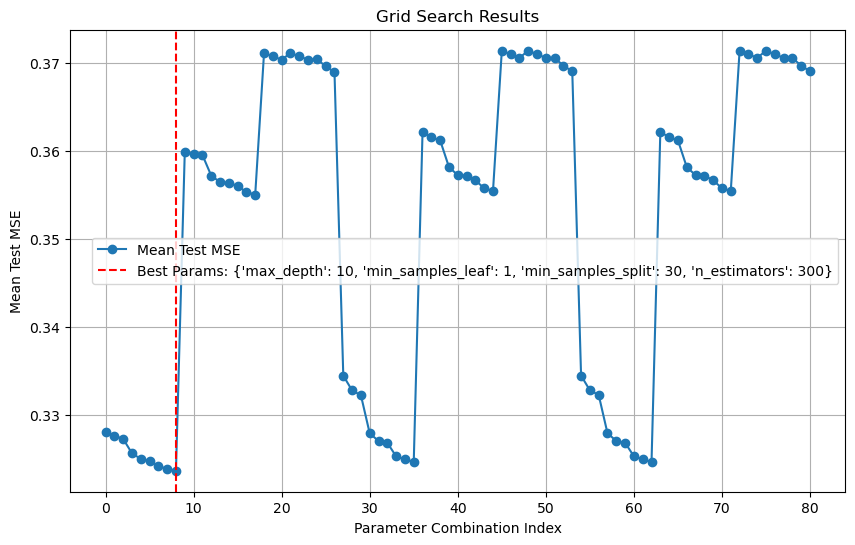

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

selected_features_9 = ['mon', 'day', 'product_encoded', 'client_encoded', 'raw_material_encoded', 'product_raw_material_interaction_encoded',
                       'product_client_interaction_encoded', 'product_mon', 'product_day']

X_train = X_train[selected_features_9]
X_test = X_test[selected_features_9]

# 定義參數網格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [1, 5, 10]
}

# 創建隨機森林回歸器
rf = RandomForestRegressor(random_state=42)

# 網格搜索
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    scoring='neg_mean_squared_error', 
    cv=3, 
    n_jobs=-1, 
    verbose=0
)
grid_search.fit(X_train, y_train)  # 直接使用原始數據

# 最佳參數和最佳分數
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (MSE):", best_score)

# 使用最佳參數訓練模型
best_rf = grid_search.best_estimator_

# 計算訓練集的評估指標
y_train_pred = best_rf.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = train_mse ** 0.5
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# 計算測試集的評估指標
y_test_pred = best_rf.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 輸出結果
print(f"Train MSE: {train_mse}")
print(f"Train RMSE: {train_rmse}")
print(f"Train MAE: {train_mae}")
print(f"Train R²: {train_r2}")

print(f"Test MSE: {test_mse}")
print(f"Test RMSE: {test_rmse}")
print(f"Test MAE: {test_mae}")
print(f"Test R²: {test_r2}")

# 提取結果進行視覺化
results = grid_search.cv_results_
mean_test_scores = -results['mean_test_score']
params = results['params']

# 創建圖示，顯示每個超參數組合的平均測試分數
plt.figure(figsize=(10, 6))
plt.plot(range(len(mean_test_scores)), mean_test_scores, marker='o', label="Mean Test MSE")
plt.axvline(
    x=np.argmin(mean_test_scores), 
    color='red', linestyle='--', label=f"Best Params: {best_params}"
)
plt.xlabel("Parameter Combination Index")
plt.ylabel("Mean Test MSE")
plt.title("Grid Search Results")
plt.legend()
plt.grid()
plt.show()

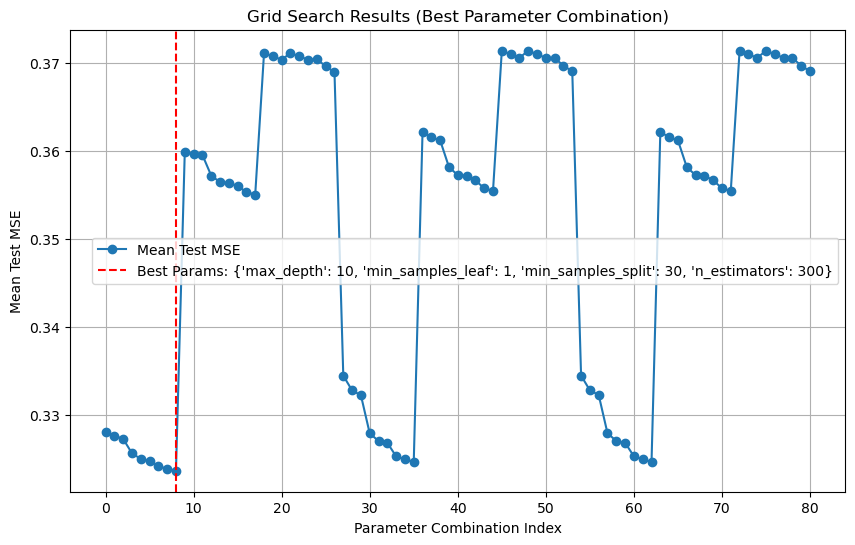

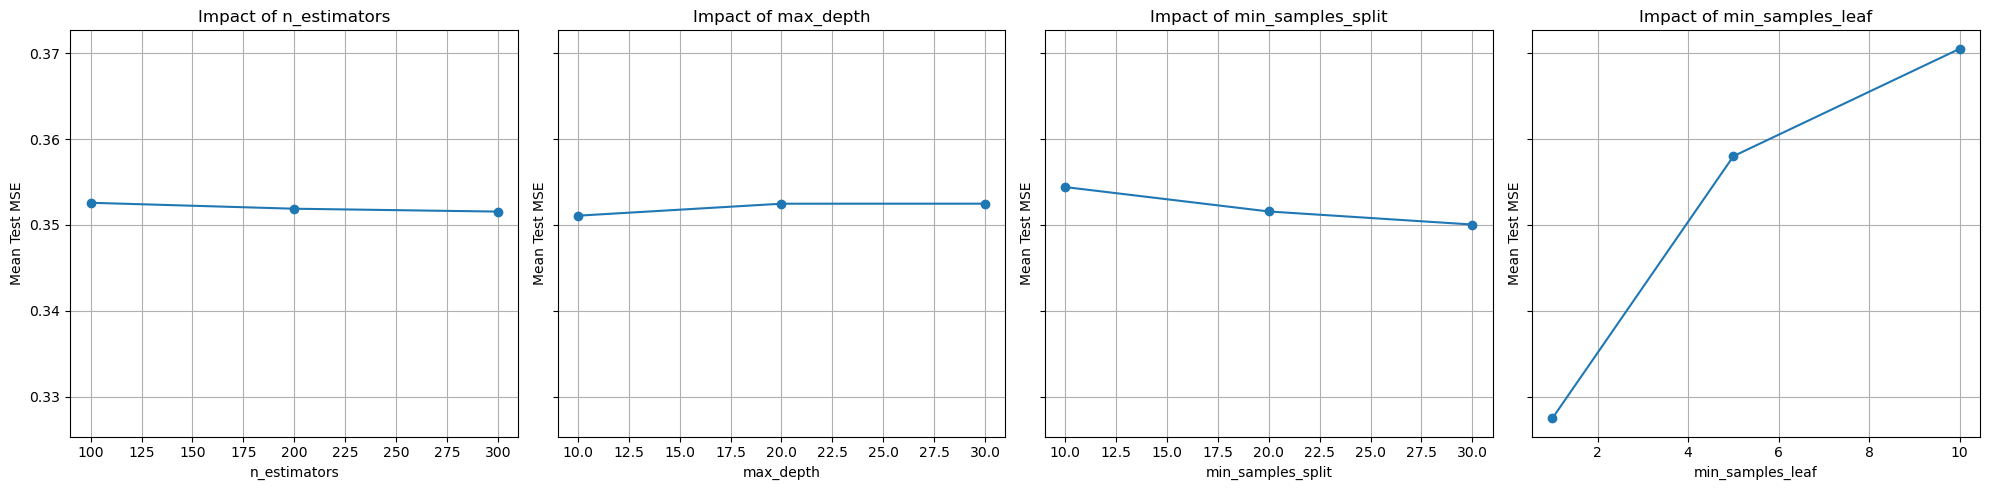

In [30]:
# 提取網格搜索結果
results = pd.DataFrame(grid_search.cv_results_)

# 繪製最佳參數組合的折線圖
plt.figure(figsize=(10, 6))
mean_test_scores = -results['mean_test_score']
plt.plot(range(len(mean_test_scores)), mean_test_scores, marker='o', label="Mean Test MSE")
plt.axvline(
    x=np.argmin(mean_test_scores), 
    color='red', linestyle='--', label=f"Best Params: {best_params}"
)
plt.xlabel("Parameter Combination Index")
plt.ylabel("Mean Test MSE")
plt.title("Grid Search Results (Best Parameter Combination)")
plt.legend()
plt.grid()
plt.show()

# 創建多子圖，分析各參數的影響
param_names = list(param_grid.keys())  # 獲取參數名稱
n_params = len(param_names)  # 總參數數量

fig, axes = plt.subplots(1, n_params, figsize=(5 * n_params, 5), sharey=True)

for i, param in enumerate(param_names):
    # 參數名稱在 GridSearchCV 的結果中以 "param_" 為前綴
    param_column = f"param_{param}"
    if param_column in results.columns:
        param_values = results[param_column]  # 該參數的所有取值
        mean_test_scores = -results['mean_test_score']  # 取負值以還原 MSE
        df = pd.DataFrame({param: param_values, 'mean_test_score': mean_test_scores})

        # 計算每個參數值的平均測試分數
        grouped = df.groupby(param)['mean_test_score'].mean().reset_index()
        axes[i].plot(grouped[param], grouped['mean_test_score'], marker='o')
        axes[i].set_xlabel(param)
        axes[i].set_ylabel("Mean Test MSE")
        axes[i].set_title(f"Impact of {param}")
        axes[i].grid()

plt.tight_layout()
plt.show()

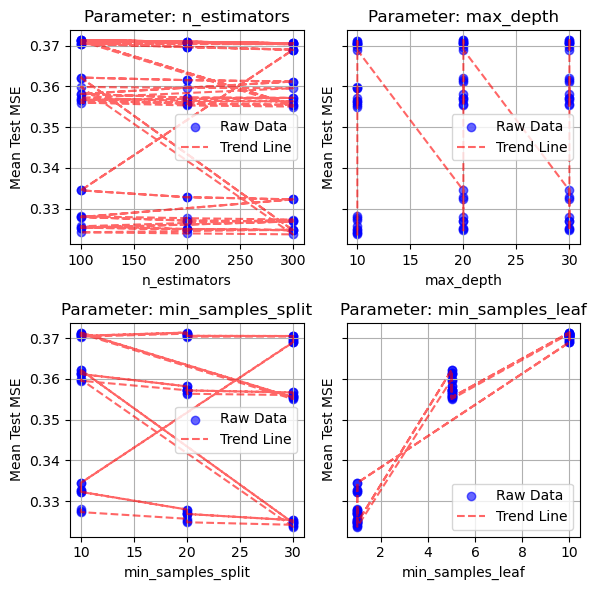

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# 提取 GridSearchCV 的結果
results = pd.DataFrame(grid_search.cv_results_)

# 參數名稱（從 param_grid 提取）
param_names = list(param_grid.keys())

# 繪製分子圖
n_params = len(param_names)  # 參數數量
fig, axes = plt.subplots(2, 2, figsize=(6, 6), sharey=True)  # 2*2 的輸出格式

# 遍歷參數並繪圖
axes = axes.ravel()  # 將 2D 的 axes 陣列展平，方便索引
for i, param in enumerate(param_names):
    # 確認結果 DataFrame 中參數名稱的格式
    param_column = f"param_{param}"
    if param_column in results.columns:
        # 提取當前參數的值及測試分數
        param_values = results[param_column]
        mean_test_scores = -results["mean_test_score"]  # MSE 取負值還原

        # 每個參數值對應的所有結果（無分組）
        axes[i].scatter(param_values, mean_test_scores, alpha=0.6, label="Raw Data", color="blue")
        axes[i].plot(param_values, mean_test_scores, alpha=0.6, linestyle="--", color="red", label="Trend Line")
        
        # 添加圖標與標題
        axes[i].set_title(f"Parameter: {param}", fontsize=12)
        axes[i].set_xlabel(param, fontsize=10)
        axes[i].set_ylabel("Mean Test MSE", fontsize=10)
        axes[i].grid()
        axes[i].legend()

# 移除多餘的子圖（如果參數少於 4 個）
if len(param_names) < len(axes):
    for j in range(len(param_names), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [33]:
# 生成新的特徵名稱列表
feature_names = X_train.columns.tolist()
print("Updated Feature Names:", feature_names)

Updated Feature Names: ['mon', 'day', 'product_encoded', 'client_encoded', 'raw_material_encoded', 'product_raw_material_interaction_encoded', 'product_client_interaction_encoded', 'product_mon', 'product_day']


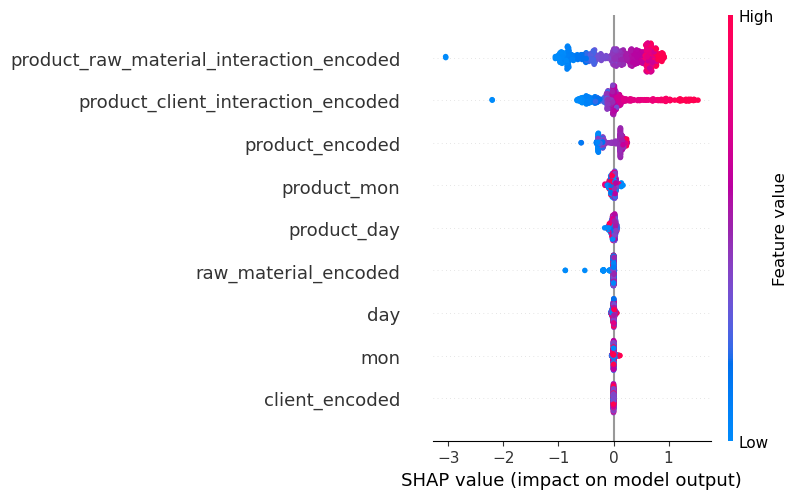

In [34]:
import shap

# 建立 SHAP 解釋器
explainer = shap.TreeExplainer(best_rf)  # 你的最佳隨機森林模型
shap_values = explainer.shap_values(X_test)  # 計算 SHAP 值

# 繪製 SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

shap_values.shape: (558, 9)
X_test.shape: (558, 9)


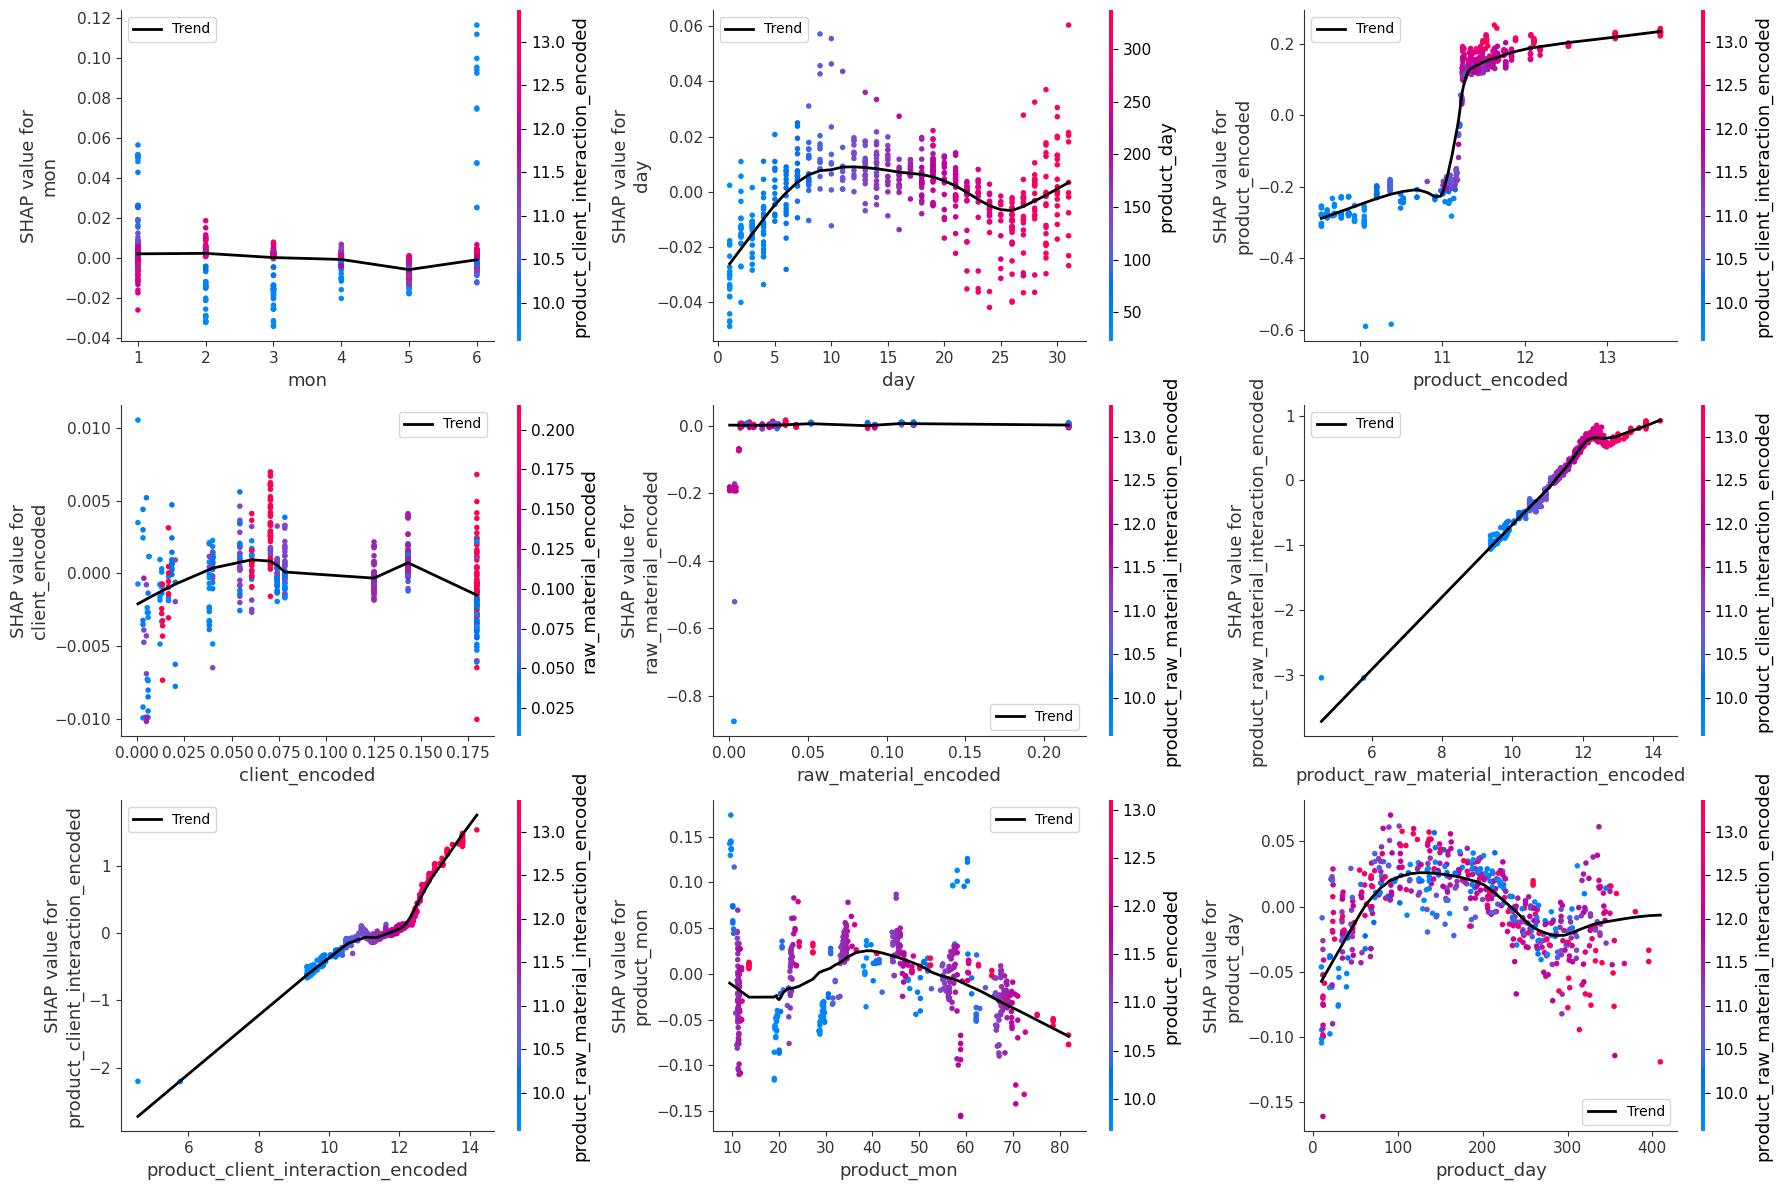

In [37]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 確保 X_test 和 shap_values 類型一致
X_test = X_test.astype(np.float64)

# 確保 shap_values 是 numpy 陣列（適用回歸問題）
if isinstance(shap_values, shap.Explanation):
    shap_values = shap_values.values  # 提取真正的 SHAP 值

# 檢查形狀
print("shap_values.shape:", shap_values.shape)
print("X_test.shape:", X_test.shape)

# 確保 SHAP 值與特徵數量一致
assert shap_values.shape == X_test.shape, "SHAP 值形狀與 X_test 不匹配！"

# 繪製 SHAP 依賴圖
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

for i, feature in enumerate(X_test.columns[:9]):  # 只繪製前 9 個特徵
    row, col = divmod(i, 3)
    ax = axes[row, col]

    shap.dependence_plot(
        feature, shap_values, X_test, ax=ax, show=False
    )

    # 加上 LOESS 平滑曲線
    feature_values = X_test[feature].values
    shap_values_feature = shap_values[:, i]

    smoothed = sm.nonparametric.lowess(shap_values_feature, feature_values, frac=0.3)
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='black', linewidth=2, label="Trend")

    ax.legend()

plt.tight_layout()
plt.show()

                                    Feature  Importance
5  product_raw_material_interaction_encoded    0.437819
6        product_client_interaction_encoded    0.353822
2                           product_encoded    0.146824
8                               product_day    0.018513
7                               product_mon    0.017803
4                      raw_material_encoded    0.014836
1                                       day    0.005812
0                                       mon    0.003212
3                            client_encoded    0.001358


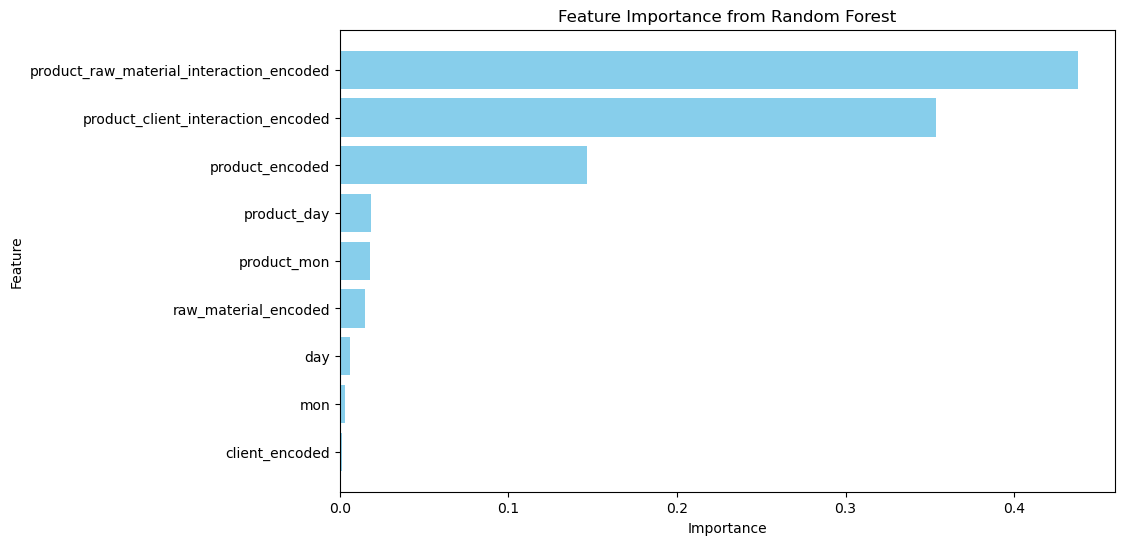

In [40]:
import pandas as pd

# 獲取隨機森林的特徵重要性
feature_importances = best_rf.feature_importances_

# 將特徵重要性轉為 DataFrame 並排序
importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# 顯示特徵重要性
print(importance_df)

# 繪製條形圖
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance from Random Forest")
plt.gca().invert_yaxis()  # 反轉 y 軸，重要特徵排在頂部
plt.show()

In [42]:
import pandas as pd

# 將 SHAP 值轉為 DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)

# 計算每個特徵的 SHAP 統計指標
shap_stats = pd.DataFrame({
    "Feature": shap_df.columns,
    "Mean SHAP Value": shap_df.mean().values,
    "Max SHAP Value": shap_df.max().values,
    "Min SHAP Value": shap_df.min().values
}).sort_values(by="Mean SHAP Value", ascending=False)

# 顯示結果
print(shap_stats)

                                    Feature  Mean SHAP Value  Max SHAP Value  \
5  product_raw_material_interaction_encoded         0.060030        0.921997   
6        product_client_interaction_encoded         0.045412        1.535151   
2                           product_encoded         0.013598        0.251635   
0                                       mon         0.000268        0.116624   
3                            client_encoded        -0.000046        0.010511   
1                                       day        -0.000790        0.060487   
8                               product_day        -0.002720        0.070263   
7                               product_mon        -0.004688        0.173460   
4                      raw_material_encoded        -0.007641        0.016664   

   Min SHAP Value  
5       -3.050343  
6       -2.206232  
2       -0.590039  
0       -0.034222  
3       -0.010135  
1       -0.048989  
8       -0.161120  
7       -0.155849  
4       -0.875646  

Cross-Validation Results:
Mean CV MSE: 0.3193240110684358 ± 0.014464707754358314
Mean CV RMSE: 0.5649463754620536 ± 0.012633444531244148
Mean CV MAE: 0.4478467813342603 ± 0.011318427580001459


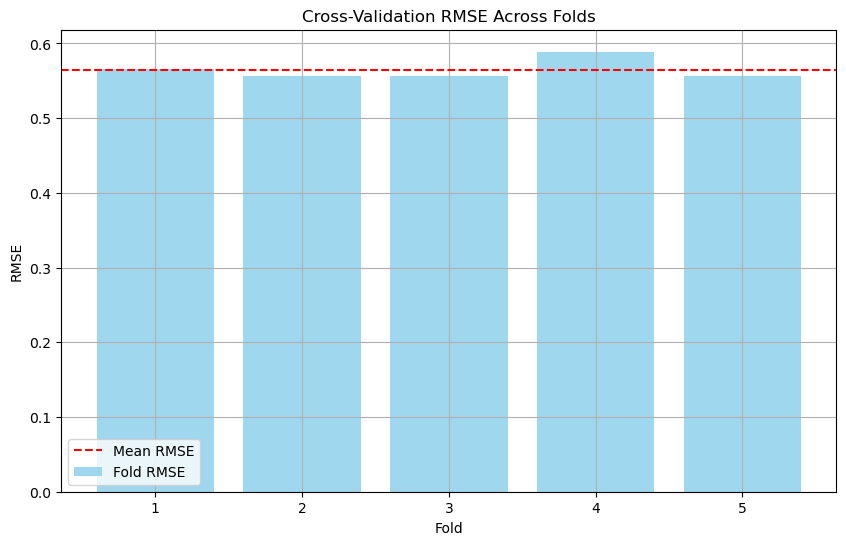

In [46]:
from sklearn.model_selection import cross_val_score

# 使用最佳模型進行交叉驗證
cv_scores = cross_val_score(
    best_rf, 
    X_train, 
    y_train, 
    scoring='neg_mean_squared_error', 
    cv=5, 
    n_jobs=-1
)

# 轉換為正值並計算平均與標準差
cv_mse_scores = -cv_scores
cv_rmse_scores = np.sqrt(cv_mse_scores)
cv_mae_scores = cross_val_score(
    best_rf, 
    X_train, 
    y_train, 
    scoring='neg_mean_absolute_error', 
    cv=5, 
    n_jobs=-1
)
cv_mae_scores = -cv_mae_scores

# 輸出交叉驗證結果
print("Cross-Validation Results:")
print(f"Mean CV MSE: {np.mean(cv_mse_scores)} ± {np.std(cv_mse_scores)}")
print(f"Mean CV RMSE: {np.mean(cv_rmse_scores)} ± {np.std(cv_rmse_scores)}")
print(f"Mean CV MAE: {np.mean(cv_mae_scores)} ± {np.std(cv_mae_scores)}")

# 視覺化交叉驗證結果
plt.figure(figsize=(10, 6))
plt.bar(range(1, 6), cv_rmse_scores, color='skyblue', alpha=0.8, label='Fold RMSE')
plt.axhline(np.mean(cv_rmse_scores), color='red', linestyle='--', label='Mean RMSE')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Across Folds')
plt.legend()
plt.grid()
plt.show()

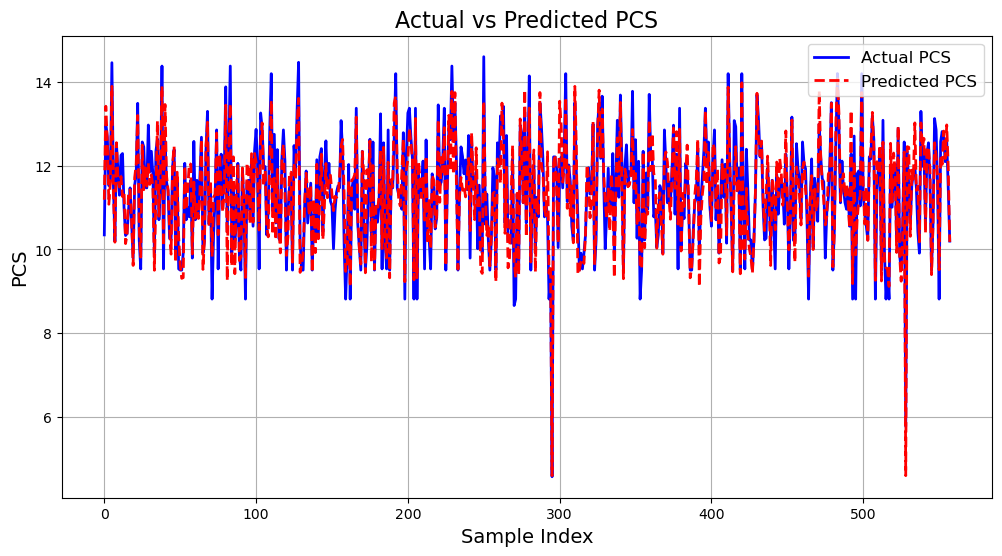

In [36]:
# 進行預測
y_test_pred = best_rf.predict(X_test)

# 可視化預測結果與實際結果的對比圖
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual PCS', color='blue', linewidth=2) 
plt.plot(y_test_pred, label='Predicted PCS', color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('PCS', fontsize=14)
plt.title('Actual vs Predicted PCS', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)
plt.show()

In [50]:
import numpy as np

# 預測值
y_pred = best_rf.predict(X_test)

# 計算絕對誤差
errors = np.abs(y_pred - y_test)

# 找到兩個誤差最大的樣本索引（最不準確）
worst_indices = np.argsort(errors)[-2:]  # 取最後兩個（誤差最大）

# 找到兩個誤差最小的樣本索引（最準確）
best_indices = np.argsort(errors)[:2]  # 取最前兩個（誤差最小）

# 取得最不準確的樣本
X_worst = X_test.iloc[worst_indices]
y_worst_true = y_test.iloc[worst_indices]
y_worst_pred = y_pred[worst_indices]

# 取得最準確的樣本
X_best = X_test.iloc[best_indices]
y_best_true = y_test.iloc[best_indices]
y_best_pred = y_pred[best_indices]

# 顯示結果
print(f"最不準確的預測樣本索引: {worst_indices.tolist()}")
for i, idx in enumerate(worst_indices):
    print(f"索引 {idx} - 真實值: {y_worst_true.iloc[i]}, 預測值: {y_worst_pred[i]}")

print(f"\n最準確的預測樣本索引: {best_indices.tolist()}")
for i, idx in enumerate(best_indices):
    print(f"索引 {idx} - 真實值: {y_best_true.iloc[i]}, 預測值: {y_best_pred[i]}")

最不準確的預測樣本索引: [300, 173]
索引 300 - 真實值: 11.878901023791917, 預測值: 13.545281108444645
索引 173 - 真實值: 10.085809109330082, 預測值: 11.903883913924375

最準確的預測樣本索引: [313, 428]
索引 313 - 真實值: 9.50599061407714, 預測值: 9.503793398557665
索引 428 - 真實值: 10.227308671603781, 預測值: 10.230879857991663


In [84]:
# 計算最不準確樣本的 SHAP 值
shap_values_worst = [explainer.shap_values(X_worst.iloc[i]) for i in range(len(X_worst))]

# 計算最準確樣本的 SHAP 值
shap_values_best = [explainer.shap_values(X_best.iloc[i]) for i in range(len(X_best))]

# 檢查 SHAP 值的大小
print(len(shap_values_worst))  # 應該顯示 2
print(len(shap_values_best))   # 應該顯示 2

2
2


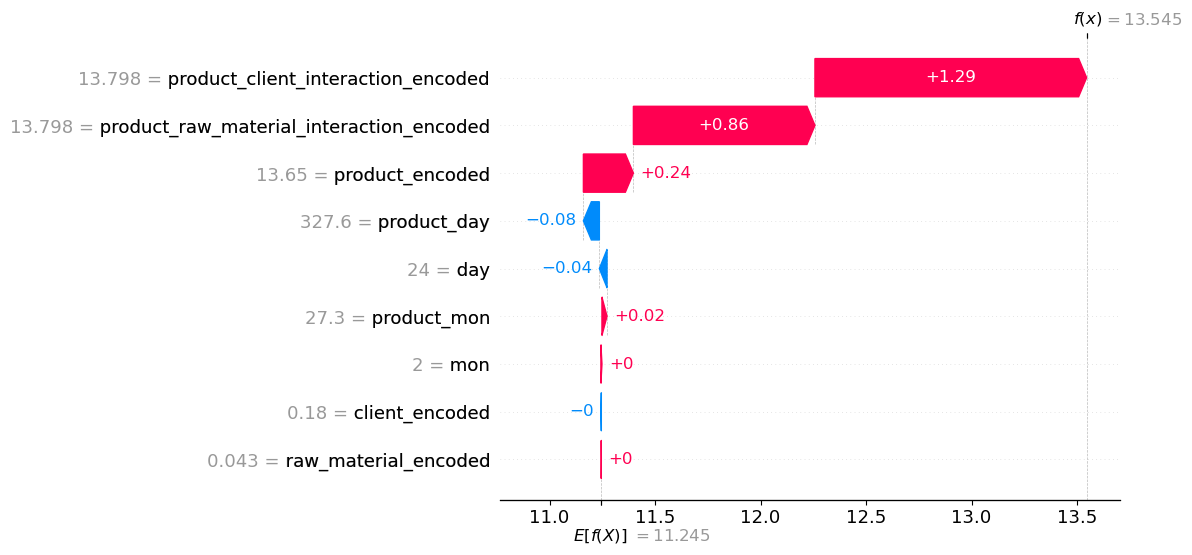

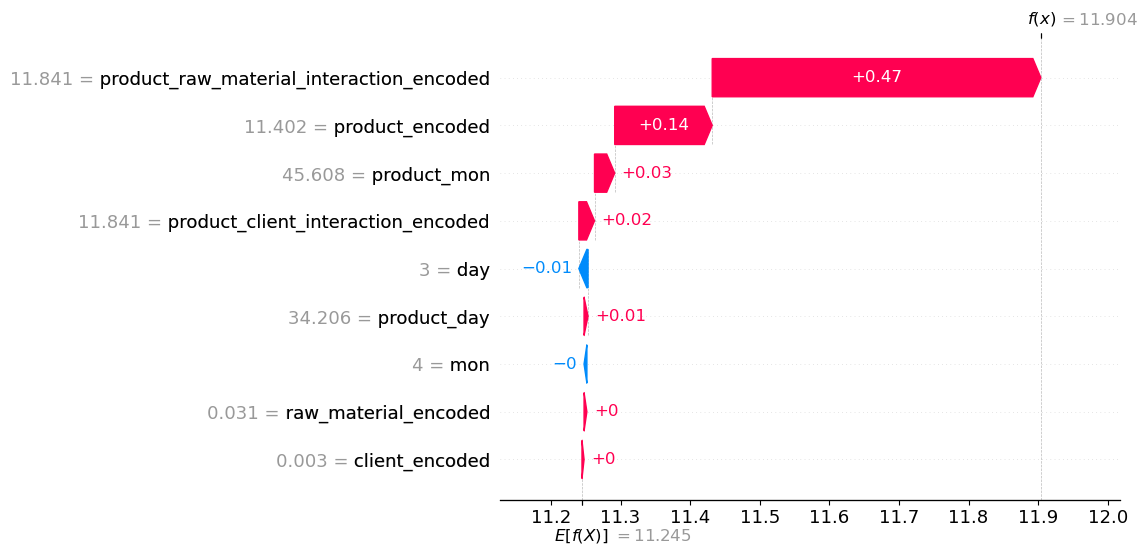

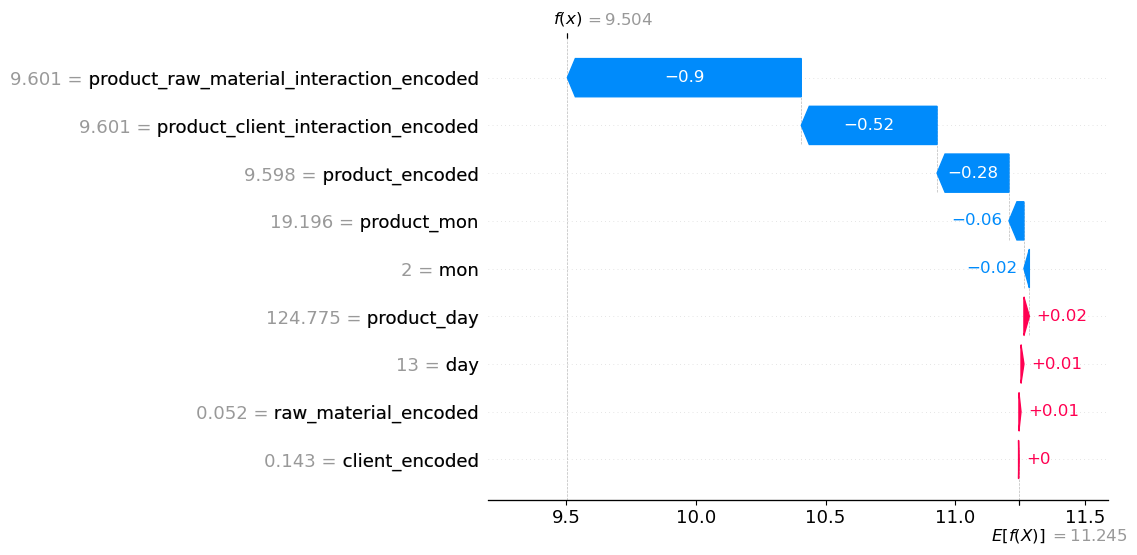

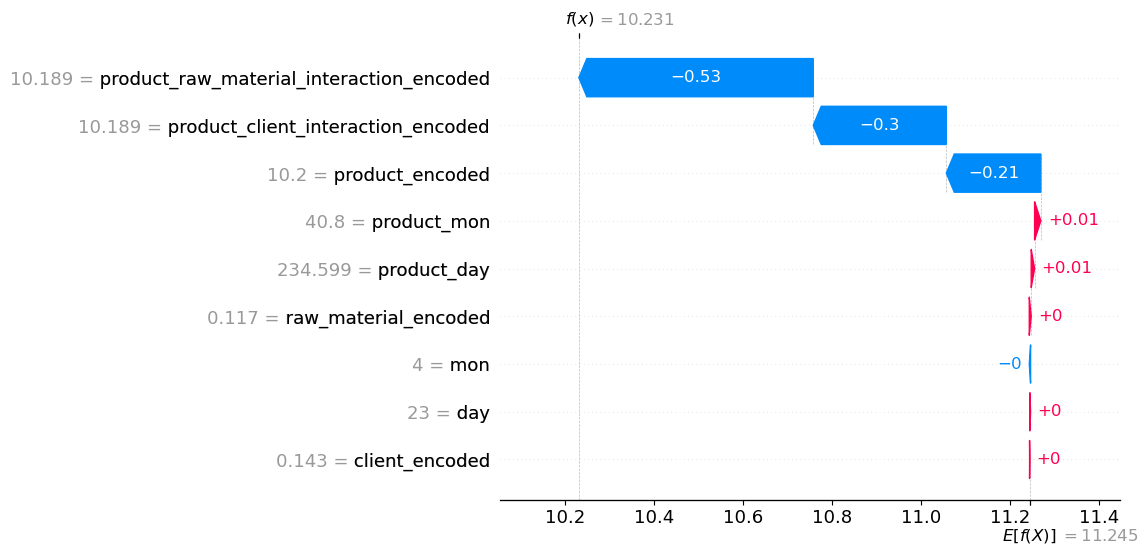

In [82]:
import shap

# 畫出最不準確樣本 300 的 SHAP 瀑布圖
shap.waterfall_plot(shap.Explanation(
    values=shap_values_worst[0],  # 最不準確樣本 300
    base_values=explainer.expected_value,
    data=X_worst.iloc[0]))

# 畫出最不準確樣本 173 的 SHAP 瀑布圖
shap.waterfall_plot(shap.Explanation(
    values=shap_values_worst[1],  # 最不準確樣本 173
    base_values=explainer.expected_value,
    data=X_worst.iloc[1]))

# 畫出最準確樣本 313 的 SHAP 瀑布圖
shap.waterfall_plot(shap.Explanation(
    values=shap_values_best[0],  # 最準確樣本 313
    base_values=explainer.expected_value,
    data=X_best.iloc[0]))

# 畫出最準確樣本 428 的 SHAP 瀑布圖
shap.waterfall_plot(shap.Explanation(
    values=shap_values_best[1],  # 最準確樣本 428
    base_values=explainer.expected_value,
    data=X_best.iloc[1]))

In [90]:
# 設定需要取得的索引
indices = [173, 300, 313, 428]

# 遍歷這些索引並顯示對應的數據
for idx in indices:
    # 使用 iloc 根據位置獲取數據
    X_data = X_test.iloc[idx]  # 特徵數據
    y_true = y_test.iloc[idx]  # 真實值
    y_pred_value = y_pred[idx]  # 預測值

    # 顯示該筆數據
    print(f"=== 索引 {idx} 的特徵值 ===")
    print(X_data)
    print("\n=== 目標值 ===")
    print(f"真實值: {y_true}, 預測值: {y_pred_value}")
    print("\n" + "="*40 + "\n")

=== 索引 173 的特徵值 ===
mon                                          4.000000
day                                          3.000000
product_encoded                             11.401974
client_encoded                               0.003142
raw_material_encoded                         0.030521
product_raw_material_interaction_encoded    11.841080
product_client_interaction_encoded          11.841080
product_mon                                 45.607897
product_day                                 34.205923
Name: 1408, dtype: float64

=== 目標值 ===
真實值: 10.085809109330082, 預測值: 11.903883913924375


=== 索引 300 的特徵值 ===
mon                                           2.000000
day                                          24.000000
product_encoded                              13.649985
client_encoded                                0.179533
raw_material_encoded                          0.042639
product_raw_material_interaction_encoded     13.797706
product_client_interaction_encoded           13.79770

In [86]:
import numpy as np

# 輸入對數值
log_values = [11.878901023791917, 10.085809109330082, 9.50599061407714, 10.227308671603781]

# 透過指數轉換回原始數值
original_values = np.exp(log_values)

# 顯示結果
print("原始數值: ", original_values)

原始數值:  [144192.  24000.  13440.  27648.]


In [97]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 初始化 GBM 模型
gbm = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=10, min_samples_leaf=5, min_samples_split=2, random_state=42)
gbm.fit(X_train, y_train)

# 初始化 XGBoost 模型
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=10, min_child_weight=5, subsample=0.8, colsample_bytree=0.8, random_state=42)
xgb.fit(X_train, y_train)

# 計算 GBM 訓練集指標
y_train_pred_gbm = gbm.predict(X_train)
train_mse_gbm = mean_squared_error(y_train, y_train_pred_gbm)
train_rmse_gbm = train_mse_gbm ** 0.5
train_mae_gbm = mean_absolute_error(y_train, y_train_pred_gbm)
train_r2_gbm = r2_score(y_train, y_train_pred_gbm)

# 計算 GBM 測試集指標
y_test_pred_gbm = gbm.predict(X_test)
test_mse_gbm = mean_squared_error(y_test, y_test_pred_gbm)
test_rmse_gbm = test_mse_gbm ** 0.5
test_mae_gbm = mean_absolute_error(y_test, y_test_pred_gbm)
test_r2_gbm = r2_score(y_test, y_test_pred_gbm)

# 計算 XGBoost 訓練集指標
y_train_pred_xgb = xgb.predict(X_train)
train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)
train_rmse_xgb = train_mse_xgb ** 0.5
train_mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)

# 計算 XGBoost 測試集指標
y_test_pred_xgb = xgb.predict(X_test)
test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
test_rmse_xgb = test_mse_xgb ** 0.5
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

# 輸出結果
print("=== GBM 模型 ===")
print(f"Train MSE: {train_mse_gbm}")
print(f"Train RMSE: {train_rmse_gbm}")
print(f"Train MAE: {train_mae_gbm}")
print(f"Train R²: {train_r2_gbm}")

print(f"Test MSE: {test_mse_gbm}")
print(f"Test RMSE: {test_rmse_gbm}")
print(f"Test MAE: {test_mae_gbm}")
print(f"Test R²: {test_r2_gbm}")

print("\n=== XGBoost 模型 ===")
print(f"Train MSE: {train_mse_xgb}")
print(f"Train RMSE: {train_rmse_xgb}")
print(f"Train MAE: {train_mae_xgb}")
print(f"Train R²: {train_r2_xgb}")

print(f"Test MSE: {test_mse_xgb}")
print(f"Test RMSE: {test_rmse_xgb}")
print(f"Test MAE: {test_mae_xgb}")
print(f"Test R²: {test_r2_xgb}")

=== GBM 模型 ===
Train MSE: 0.025841194715564297
Train RMSE: 0.16075196644384881
Train MAE: 0.11424244799557103
Train R²: 0.9856476457724253
Test MSE: 0.317389905302319
Test RMSE: 0.5633736817622198
Test MAE: 0.4347173751904023
Test R²: 0.8161958113782943

=== XGBoost 模型 ===
Train MSE: 0.02355001871166154
Train RMSE: 0.15346015349810369
Train MAE: 0.11080030974965482
Train R²: 0.9869201786397206
Test MSE: 0.3197492506268846
Test RMSE: 0.5654637482870892
Test MAE: 0.43485142157087386
Test R²: 0.8148294870377419


In [104]:
import pandas as pd

# 取得 SHAP 值對應的 DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)
shap_df["product_encoded"] = X_test["product_encoded"].values  # 加入產品編號資訊

# 計算每個產品的 SHAP 平均值（取絕對值，避免正負抵消）
product_shap_importance = shap_df.groupby("product_encoded").mean().abs().sum(axis=1)

# 排序 SHAP 值，找到最高與最低的產品
top_products = product_shap_importance.sort_values(ascending=False)  # SHAP 值高的
bottom_products = product_shap_importance.sort_values(ascending=True)  # SHAP 值低的

# 顯示 SHAP 值最高與最低的前 10 名產品
print("SHAP 值最高的前 3 名產品:")
print(top_products.head(3))

print("\nSHAP 值最低的前 3 名產品:")
print(bottom_products.head(3))

SHAP 值最高的前 3 名產品:
product_encoded
10.064747    6.201010
10.376536    6.182660
11.631058    2.611451
dtype: float64

SHAP 值最低的前 3 名產品:
product_encoded
11.158789    0.067700
10.814373    0.115447
11.381676    0.145733
dtype: float64


In [106]:
# 取得 SHAP 值最高的前三名產品的樣本索引
top_3_products = top_products.head(3).index
top_3_samples = shap_df[shap_df["product_encoded"].isin(top_3_products)].index

# 取得 SHAP 值最低的前三名產品的樣本索引
bottom_3_products = bottom_products.head(3).index
bottom_3_samples = shap_df[shap_df["product_encoded"].isin(bottom_3_products)].index

print("SHAP 值最高的前三名產品的樣本索引:", top_3_samples.tolist())
print("SHAP 值最低的前三名產品的樣本索引:", bottom_3_samples.tolist())

SHAP 值最高的前三名產品的樣本索引: [295, 483, 528]
SHAP 值最低的前三名產品的樣本索引: [305, 382, 389, 488, 490]


In [110]:
indices = [295, 483, 528, 305, 382, 389]

# 使用 iloc 取得對應索引的數據
selected_rows = X_test.iloc[indices]

# 顯示這些樣本的原始數據
print(selected_rows)

      mon  day  product_encoded  client_encoded  raw_material_encoded  \
2363    6    7        10.376536        0.060592              0.003142   
102     1    9        11.631058        0.018402              0.035907   
2417    6    8        10.064747        0.179533              0.003142   
437     1   28        10.814373        0.060592              0.011221   
1415    4    4        11.158789        0.038151              0.021095   
246     1   19        11.381676        0.078097              0.087971   

      product_raw_material_interaction_encoded  \
2363                                  4.564348   
102                                  14.206471   
2417                                  5.768321   
437                                  11.143599   
1415                                 11.084708   
246                                  11.115429   

      product_client_interaction_encoded  product_mon  product_day  
2363                            4.564348    62.259216    72.635752  

In [122]:
indices = [2363, 102, 2417, 437, 1415, 246]

# 從原始 df 根據索引提取對應的產品名稱
selected_products = df.loc[indices, "產品編號"]  # 假設 '產品編號' 是原始 df 中的產品名稱欄位
selected_client = df.loc[indices, "客戶名稱"]  # 假設 '產品編號' 是原始 df 中的產品名稱欄位
selected_raw_material = df.loc[indices, "原料編號"]  # 假設 '產品編號' 是原始 df 中的產品名稱欄位

# 顯示選取的產品名稱
print("選擇的產品名稱:")
print(selected_products)

print("選擇的客戶名稱:")
print(selected_client)

print("選擇的原料編號:")
print(selected_raw_material)

選擇的產品名稱:
2363    5Q56-699-45
102        7L09-G49
2417    5Q51-693-45
437        7L08-FU4
1415       7D37-I91
246        7P05-R10
Name: 產品編號, dtype: object
選擇的客戶名稱:
2363    L08
102     L09
2417    A66
437     L08
1415    D37
246     P05
Name: 客戶名稱, dtype: object
選擇的原料編號:
2363    1BT-N0J15P35352D
102     1BT-30M20PZZ222D
2417    1BT-N0J15P35352D
437     1BT-A5T41P5343DK
1415    1BT-66T04P32212M
246     1BT-44N10PZZ182L
Name: 原料編號, dtype: object


In [160]:
import pandas as pd
import numpy as np

# 取得 SHAP 值對應的 DataFrame
shap_df1 = pd.DataFrame(shap_values, columns=X_test.columns)
shap_df1["product_raw_material_interaction_encoded"] = X_test["product_raw_material_interaction_encoded"].values  # 加入原料資訊

# 確保數據類型一致
shap_df1["product_raw_material_interaction_encoded"] = shap_df1["product_raw_material_interaction_encoded"].astype(str)

# 計算每個產品的 SHAP 平均影響值
product_shap_importance_1 = shap_df1.groupby("product_raw_material_interaction_encoded").mean().abs().mean(axis=1)

# 排序 SHAP 值，找到最高與最低的產品
top_products_1 = product_shap_importance_1.sort_values(ascending=False)  # SHAP 值高的
bottom_products_1 = product_shap_importance_1.sort_values(ascending=True)  # SHAP 值低的

# 顯示 SHAP 值最高與最低的前 3 名產品
print("SHAP 值最高的前 3 名產品:\n", top_products_1.head(3))
print("\nSHAP 值最低的前 3 名產品:\n", bottom_products_1.head(3))

SHAP 值最高的前 3 名產品:
 product_raw_material_interaction_encoded
5.768320995793772     0.467588
4.564348191467836     0.464832
14.206470979869557    0.242787
dtype: float64

SHAP 值最低的前 3 名產品:
 product_raw_material_interaction_encoded
11.50713820167413     0.013839
11.897371205854318    0.017483
11.698069048286401    0.018771
dtype: float64


In [162]:
# 取得 SHAP 值最高的前三名產品的樣本索引
top_3_products_1 = top_products_1.head(3).index
top_3_samples_1 = shap_df1[shap_df1["product_raw_material_interaction_encoded"].isin(top_3_products_1)].index

# 取得 SHAP 值最低的前三名產品的樣本索引
bottom_3_products_1 = bottom_products_1.head(3).index
bottom_3_samples_1 = shap_df1[shap_df1["product_raw_material_interaction_encoded"].isin(bottom_3_products_1)].index

# 如果低 SHAP 值的產品對應的樣本數過多，則隨機選 3 個
if len(top_3_samples_1) > 3:
    top_3_samples_1 = np.random.choice(top_3_samples_1, size=3, replace=False)
if len(bottom_3_samples_1) > 3:
    bottom_3_samples_1 = np.random.choice(bottom_3_samples_1, size=3, replace=False)

print("SHAP 值最高的前三名產品的樣本索引:", top_3_samples_1.tolist())
print("SHAP 值最低的前三名產品的樣本索引:", bottom_3_samples_1.tolist())

SHAP 值最高的前三名產品的樣本索引: [295, 483, 528]
SHAP 值最低的前三名產品的樣本索引: [352, 397, 251]


In [164]:
indices_1 = [295, 483, 528, 352, 397, 251]

# 使用 iloc 取得對應索引的數據
selected_rows_1 = X_test.iloc[indices_1]

# 顯示這些樣本的原始數據
print(selected_rows_1)

      mon  day  product_encoded  client_encoded  raw_material_encoded  \
2363    6    7        10.376536        0.060592              0.003142   
102     1    9        11.631058        0.018402              0.035907   
2417    6    8        10.064747        0.179533              0.003142   
2357    6    6        11.235027        0.070467              0.215440   
487     1   31        11.378309        0.038151              0.007181   
1439    4    5        11.235027        0.070467              0.215440   

      product_raw_material_interaction_encoded  \
2363                                  4.564348   
102                                  14.206471   
2417                                  5.768321   
2357                                 11.507138   
487                                  11.698069   
1439                                 11.507138   

      product_client_interaction_encoded  product_mon  product_day  
2363                            4.564348    62.259216    72.635752  

In [166]:
indices_1 = [2363, 102, 2417, 2357, 487, 1439]

# 從原始 df 根據索引提取對應的產品名稱
selected_products_1 = df.loc[indices_1, "產品編號"]  # 假設 '產品編號' 是原始 df 中的產品名稱欄位
selected_client_1 = df.loc[indices_1, "客戶名稱"]  # 假設 '產品編號' 是原始 df 中的產品名稱欄位
selected_raw_material_1 = df.loc[indices_1, "原料編號"]  # 假設 '產品編號' 是原始 df 中的產品名稱欄位

# 顯示選取的產品名稱
print("選擇的產品名稱:")
print(selected_products_1)

print("選擇的客戶名稱:")
print(selected_client_1)

print("選擇的原料編號:")
print(selected_raw_material_1)

選擇的產品名稱:
2363    5Q56-699-45
102        7L09-G49
2417    5Q51-693-45
2357       7Q59-443
487        7D37-J73
1439       7Q59-443
Name: 產品編號, dtype: object
選擇的客戶名稱:
2363    L08
102     L09
2417    A66
2357    L19
487     D37
1439    L19
Name: 客戶名稱, dtype: object
選擇的原料編號:
2363    1BT-N0J15P35352D
102     1BT-30M20PZZ222D
2417    1BT-N0J15P35352D
2357    1BT-43N10PZZ112L
487     1BT-66T06P32212M
1439    1BT-43N10PZZ112L
Name: 原料編號, dtype: object


In [180]:
# 取得 SHAP 值對應的 DataFrame
shap_df2 = pd.DataFrame(shap_values, columns=X_test.columns)
shap_df2["product_client_interaction_encoded"] = X_test["product_client_interaction_encoded"].values  # 加入原料資訊

# 確保數據類型一致
shap_df2["product_client_interaction_encoded"] = shap_df2["product_client_interaction_encoded"].astype(str)

# 計算每個產品的 SHAP 平均影響值
product_shap_importance_2 = shap_df2.groupby("product_client_interaction_encoded").mean().abs().mean(axis=1)

# 計算 SHAP 值的 25% 分位數
shap_25_percentile = product_shap_importance_2.quantile(0.25)

# SHAP 值高的產品（取前三名，不重複）
top_products_2 = product_shap_importance_2.sort_values(ascending=False)
top_3_products_2 = top_products_2.index[:3]

# SHAP 值低的產品（低於 25% 分位數，並取前三名，不重複）
bottom_products_2 = product_shap_importance_2[product_shap_importance_2 <= shap_25_percentile].sort_values(ascending=True)
bottom_3_products_2 = bottom_products_2.index[:3]  # 取前三個不重複品項

# 取得 SHAP 值最高的前三名產品的樣本索引
top_3_samples_2 = shap_df2[shap_df2["product_client_interaction_encoded"].isin(top_3_products_2)].index

# 取得 SHAP 值最低的產品（低於 25% 分位數）的樣本索引
bottom_3_samples_2 = shap_df2[shap_df2["product_client_interaction_encoded"].isin(bottom_3_products_2)].index

In [182]:
# 如果 SHAP 值高或低的產品對應的樣本數過多，則隨機選 3 個
if len(top_3_samples_2) > 3:
    top_3_samples_2 = np.random.choice(top_3_samples_2, size=3, replace=False)
if len(bottom_3_samples_2) > 3:
    bottom_3_samples_2 = np.random.choice(bottom_3_samples_2, size=3, replace=False)

print("SHAP 值最高的前三名產品的樣本索引:", top_3_samples_2.tolist())
print("SHAP 值最低的前三名產品的樣本索引:", bottom_3_samples_2.tolist())

SHAP 值最高的前三名產品的樣本索引: [67, 295, 528]
SHAP 值最低的前三名產品的樣本索引: [194, 448, 238]


In [184]:
indices_2 = [67, 295, 528, 194, 448, 238]

# 使用 iloc 取得對應索引的數據
selected_rows_2 = X_test.iloc[indices_2]

# 顯示這些樣本的原始數據
print(selected_rows_2)

      mon  day  product_encoded  client_encoded  raw_material_encoded  \
1135    3   14        11.342793        0.000449              0.000449   
2363    6    7        10.376536        0.060592              0.003142   
2417    6    8        10.064747        0.179533              0.003142   
70      1    6        11.272734        0.179533              0.215440   
496     1   31        11.272734        0.179533              0.215440   
1357    3   29        11.279278        0.060592              0.215440   

      product_raw_material_interaction_encoded  \
1135                                 12.396362   
2363                                  4.564348   
2417                                  5.768321   
70                                   11.238213   
496                                  11.238213   
1357                                 11.212639   

      product_client_interaction_encoded  product_mon  product_day  
1135                           12.396362    34.028379   158.799101  

In [186]:
indices_2 = [1135, 2363, 2417, 70, 496, 1357]

# 從原始 df 根據索引提取對應的產品名稱
selected_products_2 = df.loc[indices_2, "產品編號"]  # 假設 '產品編號' 是原始 df 中的產品名稱欄位
selected_client_2 = df.loc[indices_2, "客戶名稱"]  # 假設 '產品編號' 是原始 df 中的產品名稱欄位
selected_raw_material_2 = df.loc[indices_2, "原料編號"]  # 假設 '產品編號' 是原始 df 中的產品名稱欄位

# 顯示選取的產品名稱
print("選擇的產品名稱:")
print(selected_products_2)

print("選擇的客戶名稱:")
print(selected_client_2)

print("選擇的原料編號:")
print(selected_raw_material_2)

選擇的產品名稱:
1135       7T80-110
2363    5Q56-699-45
2417    5Q51-693-45
70         7Q51-584
496        7Q51-584
1357       7Q56-437
Name: 產品編號, dtype: object
選擇的客戶名稱:
1135    T08
2363    L08
2417    A66
70      A66
496     A66
1357    L08
Name: 客戶名稱, dtype: object
選擇的原料編號:
1135    1BT-30M20PZZ252D
2363    1BT-N0J15P35352D
2417    1BT-N0J15P35352D
70      1BT-43N10PZZ112L
496     1BT-43N10PZZ112L
1357    1BT-43N10PZZ112L
Name: 原料編號, dtype: object
